In [2]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [3]:
def K(X, Xdot, l):
    return np.exp(-cdist(X,Xdot)**2/(2.0*l**2))

In [21]:
test_inputs = np.loadtxt('test_inputs').reshape(-1,1)
train_inputs = np.loadtxt('train_inputs').reshape(-1,1)
train_outputs = np.loadtxt('train_outputs').reshape(-1,1)

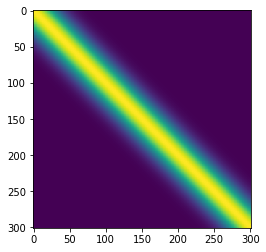

In [9]:
plt.imshow(K(test_inputs,test_inputs,1))

In [17]:
K(test_inputs,test_inputs,1).shape

(301, 301)

In [12]:
def sample_prior(X,l,N):
    return np.random.multivariate_normal([0]*X.shape[0],K(X,X,l),N)

In [15]:
samples = sample_prior(test_inputs,l=1,N=5)

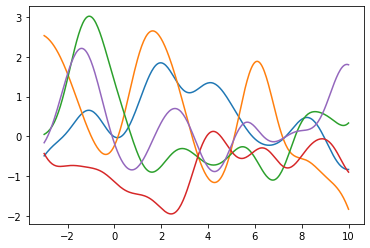

In [16]:
for i in range(5):
    plt.plot(test_inputs,samples[i,:])

In [18]:
def predictive_mean(X, y, Xdot, l, sigma):
    return K(Xdot,X,l)@np.linalg.solve(K(X,X,l)+sigma**2*np.eye(X.shape[0]),y)

In [23]:
def predictive_cov(X, y, Xdot, l, sigma):
    return K(Xdot,Xdot,l) - \
            K(Xdot,X,l)@np.linalg.solve(K(X,X,l)+
                                        sigma**2*\
                                        np.eye(X.shape[0]),
                                        K(X,Xdot,l)) 

In [29]:
mean = predictive_mean(train_inputs,train_outputs,test_inputs,1,1).reshape(-1)

In [30]:
cov = predictive_cov(train_inputs,train_outputs,test_inputs,1,1)

In [31]:
std = np.sqrt(np.diag(cov)).reshape(-1)

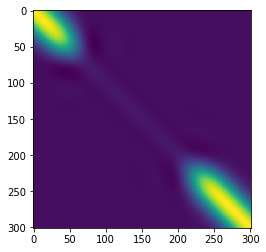

In [26]:
plt.imshow(cov)

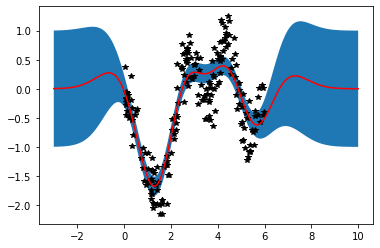

In [36]:
plt.plot(train_inputs, train_ouputs,'k*')
plt.plot(test_inputs, mean, 'r')
plt.fill_between(test_inputs.reshape(-1), mean+std, mean-std)

In [38]:
samples = np.random.multivariate_normal(mean, cov, 5)

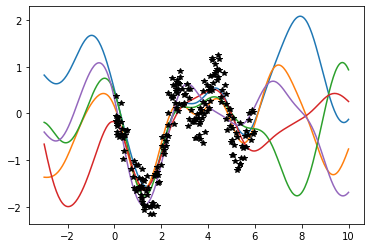

In [40]:
for i in range(5):
    plt.plot(test_inputs,samples[i,:])
plt.plot(train_inputs, train_ouputs,'k*')